# PERSIM


A python package for analyzing persistence diagram. It currently includes implementations of most of the popular methods of working with persistence diagrams, including
* Bottleneck distance  
* Wasserstein distance  
* Sliced Wasserstein Kernel
* Heat Kernel
* Persistence Images
* Persistence Landscapes
* Diagram plotting

# pip install dependencies
•	**pip install Cython** 
(Cython language makes writing C extensions for the Python language)

•	**pip install Ripser**
( A software for computing Vietoris–Rips persistence barcodes)

•	**pip install persim**
(Persim is a Python package for many tools used in analyzing Persistence Diagrams)


In [ ]:
pip install ripser


     |████████████████████████████████| 72 kB 407 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 4.1 MB/s 
  Created wheel for ripser: filename=ripser-0.6.1-cp37-cp37m-linux_x86_64.whl size=456089 sha256=439b4afd3afb1dbfe386850f815b87ba843c02a7989573baaefcc197cb6f5bb1
  Stored in directory: /root/.cache/pip/wheels/6b/e3/c8/209a9df47cc9af8c6d2dbee4db558dc129494d3f4fbd670285
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18120 sha256=7308e641fc4ccac63dd154e5b82b2ea737fcc1e39025bb001b957de77ebc2213
  Stored in directory: /root/.cache/pip/wheels/d2/9f/a8/67f1b86e47cd17338d3d07939f4660378e65b758c4594f96e3
Successfully built ripser hopcroftkarp


In [ ]:
pip install persim

In [ ]:
pip install tadasets

In [ ]:
import numpy as np
import persim
import tadasets
import ripser
import matplotlib.pyplot as plt

In [ ]:
pip install -U giotto-tda

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 404 kB 40.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.1 MB 47.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Import the gtda modules
from gtda.time_series import Resampler, SlidingWindow, takens_embedding_optimal_parameters, \
    TakensEmbedding, PermutationEntropy
from gtda.homology import WeakAlphaPersistence, VietorisRipsPersistence
from gtda.diagrams import Scaler, Filtering, PersistenceEntropy, BettiCurve, PairwiseDistance
from gtda.graphs import KNeighborsGraph, GraphGeodesicDistance

from gtda.pipeline import Pipeline

import numpy as np
from sklearn.metrics import pairwise_distances

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# gtda plotting functions
from gtda.plotting import plot_heatmap

# Importing and Plotting of data


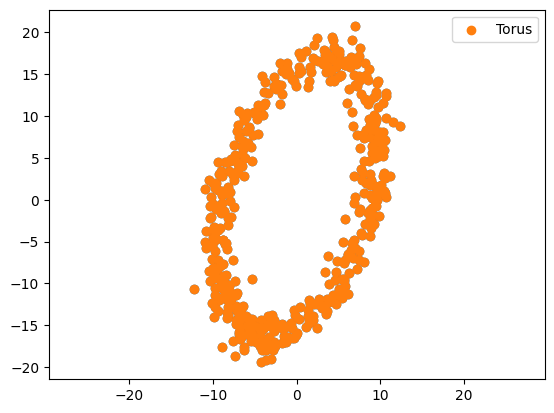

In [ ]:
data_clean = tadasets.torus(n=500, c=20, a=1, ambient=5, noise=1.5)
#data_noisy = tadasets.torus(n=200, c=2, a=1, ambient = 50, noise=0.1)


plt.scatter(data_clean[:,0], data_clean[:,1])
plt.scatter(data_clean[:,0], data_clean[:,1], label="Torus")
plt.axis('equal')
plt.legend()
plt.show()


# Generate H1 diagrams for each of the data sets


In [ ]:
dgm_clean = ripser.ripser(data_clean)['dgms'][0]
dgm_clean1 = ripser.ripser(data_clean)['dgms'][1]



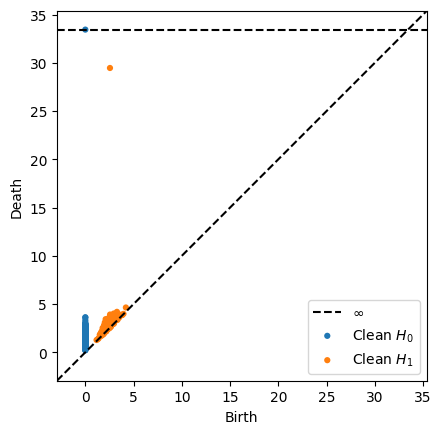

In [ ]:
#persim.plot_diagrams([dgm_clean, dgm_noisy] , labels=['Clean $H_1$', 'Noisy $H_1$'])
persim.plot_diagrams([dgm_clean, dgm_clean1] , labels=['Clean $H_0$','Clean $H_1$'])
#persim.plot_diagrams([dgm_clean1] , labels=['Clean $H_1$'])
plt.show()


ValueError: ignored

numpy.ndarray

NameError: ignored

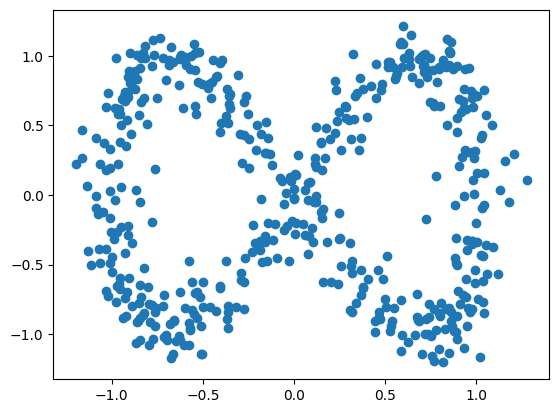

In [ ]:
infty_sign = tadasets.infty_sign(n=500, noise=0.1)
plt.scatter(infty_sign[:,0], infty_sign[:,1], label='q')
dgm_clean = ripser.ripser(infty_sign)['dgms'][0]
dgm_clean1 = ripser.ripser(infty_sign)['dgms'][1]

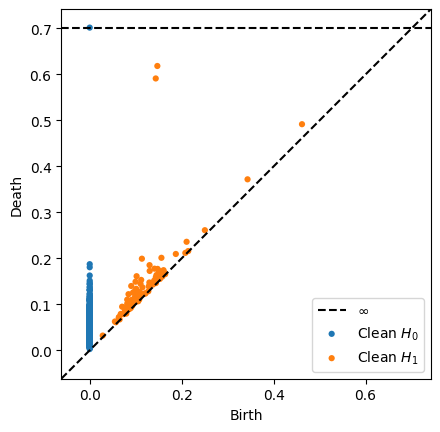

In [ ]:
persim.plot_diagrams([dgm_clean, dgm_clean1] , labels=['Clean $H_0$','Clean $H_1$'])
#persim.plot_diagrams([dgm_clean1] , labels=['Clean $H_1$'])

# Compute and Visualize the bottleneck distance

```
persim.bottleneck(dgm1, dgm2, matching=False)	Perform the Bottleneck distance matching between persistence diagrams
```
matching (bool, default False) – if True, return matching infromation and cross-similarity matrix.

Returns
d (float) – bottleneck distance between dgm1 and dgm2

(matching, D) (Only returns if matching=True) – (tuples of matched indices, (N+M)x(N+M) cross-similarity matrix)


Note: for more description see, 
(https://persim.scikit-tda.org/en/latest/reference/stubs/persim.bottleneck.html)

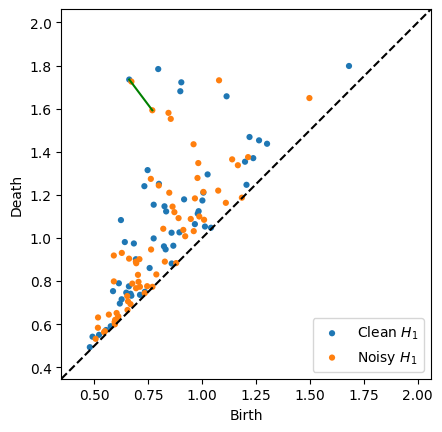

In [ ]:
distance_bottleneck, (matching, D) = persim.bottleneck(dgm_clean, dgm_noisy, matching=True)
persim.bottleneck_matching(dgm_clean, dgm_noisy, matching, D, labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.show()


In [ ]:
a = persim.bottleneck(dgm_clean, dgm_noisy)
print(a)


0.1426008939743042


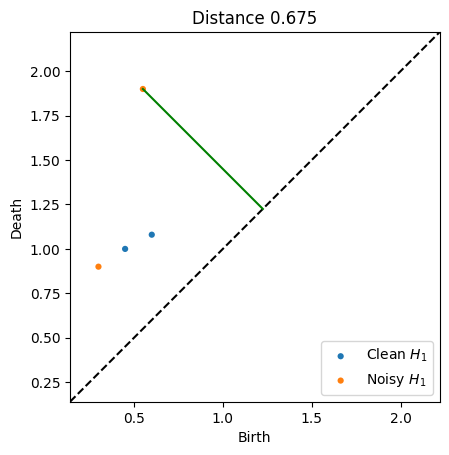

In [ ]:
dgm1 = np.array([[0.45, 1],[0.6, 1.08]])
dgm2 = np.array([[0.55, 1.9],[0.3,0.9]])
d, (matching, D) = persim.bottleneck(dgm1,dgm2,matching=True)
persim.bottleneck_matching(dgm1, dgm2, matching, D, labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.title("Distance {:.3f}".format(d))
plt.show()

In [ ]:
matching, D

([(0, 1), (1, 3), (2, 0), (3, 2)], array([[0.9  , 0.15 , 0.275, 0.9  ],
        [0.82 , 0.3  , 0.9  , 0.24 ],
        [0.675, 0.9  , 0.   , 0.   ],
        [0.9  , 0.3  , 0.   , 0.   ]]))

# Compute and Visualize the Wasserstein distance


```
persim.wasserstein(dgm1, dgm2, matching=False 	Perform the Wasserstein distance matching between persistence diagrams
```
Note: for more description see, https://persim.scikit-tda.org/en/latest/reference/stubs/persim.wasserstein.html#persim.wasserstein

Parameters
* dgm1 (Mx(>=2)) – array of birth/death pairs for PD 1

* dgm2 (Nx(>=2)) – array of birth/death paris for PD 2

matching (bool, default False) – if True, return matching information and cross-similarity matrix

Returns
* d (float) – Wasserstein distance between dgm1 and dgm2

(matching, D) (Only returns if matching=True) – (tuples of matched indices, (N+M)x(N+M) cross-similarity matrix)


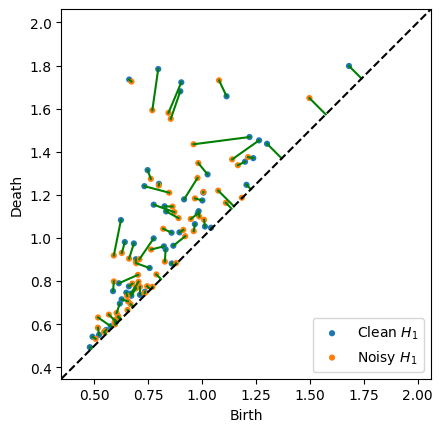

In [ ]:
distance_wasserstein, (matching, D) = persim.wasserstein(dgm_clean, dgm_noisy, matching=True)
persim.wasserstein_matching(dgm_clean, dgm_noisy, matching, D, labels=['Clean $H_1$', 'Noisy $H_1$'])
plt.show()


In [ ]:
d=persim.wasserstein(dgm_clean, dgm_noisy)
print(d)


3.7698604369165585


# Compute the Sliced-Wasserstein distance


```
persim.sliced_wasserstein(PD1, PD2, M=50)     Sliced Wasserstein Kernel for Persistence Diagrams.

```
Parameters
* PD1 (np.array size (m,2)) – Persistence diagram

* PD2 (np.array size (n,2)) – Persistence diagram

M (int, default is 50) – Iterations to run approximation.

Returns
* sw (float) – Sliced Wasserstein distance between PD1 and PD2


In [ ]:
e=persim.sliced_wasserstein(dgm_clean, dgm_noisy)
print(e)


1.950708855026616


In [ ]:
Ms = range(5, 100, 2)
ds = [persim.sliced_wasserstein(dgm_clean, dgm_noisy, M=M) for M in Ms]


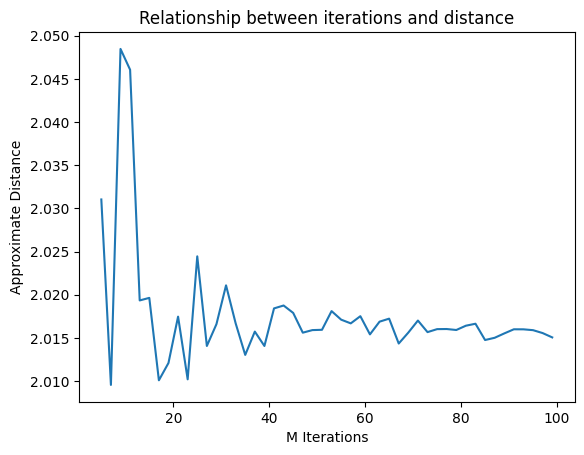

In [ ]:
plt.plot(Ms, ds)
plt.xlabel("M Iterations")
plt.ylabel("Approximate Distance")
plt.title("Relationship between iterations and distance")
plt.show()


# Compute the Heat Kernel distance



```
	persim.heat(dgm1, dgm2, sigma=0.4)	Return the pseudo-metric between two diagrams.

```
Parameters
* dgm1 (np.array (m,2)) – A persistence diagram

* dgm2 (np.array (n,2)) – A persistence diagram

sigma (float) – Heat diffusion parameter (larger sigma makes blurrier)

Returns
* dist (float) – heat kernel distance between dgm1 and dgm2


In [ ]:
sigmas = np.linspace(0.1, 10, 50)
ds = [persim.heat(dgm_clean, dgm_noisy, sigma=s) for s in sigmas]
print(ds)


[0.5876055540546992, 0.14549640533364536, 0.07181807652170234, 0.04455272389947902, 0.031046646848914394, 0.023218809942874008, 0.01820989958573564, 0.014778111474151714, 0.012306106778881224, 0.010455902680601441, 0.009028523463154369, 0.007899989924569358, 0.006989446178993001, 0.006242144542795777, 0.005619832594721315, 0.005095060323613083, 0.004647671926853818, 0.004262568925790458, 0.003928241125538523, 0.0036357765703505856, 0.0033781789008712234, 0.0031498870089961078, 0.002946430834748333, 0.002764180646092839, 0.0026001616785845806, 0.0024519152352379834, 0.0023173933087407344, 0.002194877724278605, 0.002082917446424519, 0.0019802795006703742, 0.0018859102072562586, 0.0017989043054757756, 0.0017184801704037426, 0.001643959779692267, 0.0015747524035603815, 0.001510341248428422, 0.0014502724488404935, 0.0013941459461276461, 0.0013416078901049306, 0.0012923442760254683, 0.0012460755936792899, 0.0012025523037438425, 0.0011615510010750802, 0.0011228711433536314, 0.0010863322543277

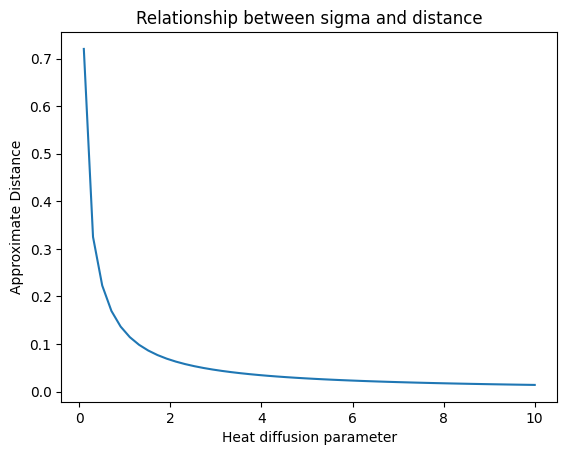

In [ ]:
plt.plot(sigmas, ds)
plt.xlabel("Heat diffusion parameter")
plt.ylabel("Approximate Distance")
plt.title("Relationship between sigma and distance")
plt.show()


# Persistence images



```
persim.PersistenceImager(birth_range=None, pers_range=None,pixel_size=None,weight=None, weight_params=None,kernel=None, 
kernel_params=None)
  	Transformer which converts persistence diagrams into persistence images.

```




**Example**
*	First see the command of PersistenceImager() object:

In [ ]:
 from persim import PersistenceImager
 pimgr = PersistenceImager(pixel_size=0.2, birth_range=(0,1))


* Printing a PersistenceImager() object will print its hyperparameters:

In [ ]:
 print(pimgr)

PersistenceImager(birth_range=(0.0, 1.0), pers_range=(0.0, 1.0), pixel_size=0.2, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})


•	PersistenceImager() attributes can be adjusted at or after instantiation. Updating attributes of a PersistenceImager() object will automatically update all other dependent attributes:

In [ ]:
pimgr.pixel_size = 0.1
pimgr.birth_range = (0, 2)
print(pimgr)
print(pimgr.resolution)


PersistenceImager(birth_range=(0.0, 2.0), pers_range=(0.0, 1.0), pixel_size=0.1, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(20, 10)




```
fit(pers_dgms[, skew])   Choose persistence image range parameters which minimally enclose all persistence pairs across one or more persistence diagrams.

```
Description: 
* The fit() method can be called on one or more (-,2) numpy.ndarrays to automatically determine the miniumum birth and persistence ranges needed to capture all persistence pairs. The ranges and resolution are automatically adjusted to accomodate the specified pixel size. The option skew=True specifies that the diagram is currently in birth-death coordinates and must first be transformed to birth-persistence coordinates:



In [ ]:
import numpy as np
pimgr = PersistenceImager(pixel_size=0.5)
pdgms = [np.array([[0.5, 0.8], [0.7, 2.2], [2.5, 4.0]]),np.array([[0.1, 0.2], [3.1, 3.3], [1.6, 2.9]]),np.array([[0.2, 1.5], [0.4, 0.6], [0.2, 2.6]])]
pimgr.fit(pdgms, skew=True) 
print(pimgr)
print(pimgr.resolution)



PersistenceImager(birth_range=(0.1, 3.1), pers_range=(-8.326672684688674e-17, 2.5), pixel_size=0.5, weight=persistence, weight_params={'n': 1.0}, kernel=gaussian, kernel_params={'sigma': [[1.0, 0.0], [0.0, 1.0]]})
(6, 5)


In [ ]:
q

array([[[0.5, 0.8],
        [0.7, 2.2],
        [2.5, 4. ]],

       [[0.1, 0.2],
        [3.1, 3.3],
        [1.6, 2.9]],

       [[0.2, 1.5],
        [0.4, 0.6],
        [0.2, 2.6]]])



```
fit_transform(pers_dgms[, skew])  Choose persistence image range parameters which minimally enclose all persistence pairs across one or more persistence diagrams and transform the persistence diagrams into persistence images.

```
Description: 
* The transform() method can then be called on one or more (-,2) numpy.ndarrays to generate persistence images from diagrams. The option skew=True specifies that the diagrams are currently in birth-death coordinates and must first be transformed to birth-persistence coordinates:



In [ ]:
pimgs = pimgr.transform(pdgms, skew=True)
pimgs[0]
print(pimgs)


[array([[0.03999068, 0.05688393, 0.06672051, 0.06341749, 0.04820814],
       [0.04506697, 0.06556791, 0.07809764, 0.07495246, 0.05730671],
       [0.04454486, 0.06674611, 0.08104366, 0.07869919, 0.06058808],
       [0.04113063, 0.0636504 , 0.07884635, 0.07747833, 0.06005714],
       [0.03625436, 0.05757744, 0.07242608, 0.07180125, 0.05593626],
       [0.02922239, 0.04712024, 0.05979033, 0.05956698, 0.04653357]]), array([[0.01766778, 0.02356504, 0.02563242, 0.02240191, 0.01556882],
       [0.02599681, 0.03613845, 0.04034715, 0.03581544, 0.02511584],
       [0.03216799, 0.04534557, 0.05103875, 0.04551205, 0.03199463],
       [0.03311948, 0.04620556, 0.05164477, 0.04584515, 0.03213749],
       [0.02865155, 0.03853791, 0.04203801, 0.03674483, 0.02551444],
       [0.0213829 , 0.02692292, 0.02799866, 0.02370253, 0.01612664]]), array([[0.04659424, 0.0743083 , 0.10299186, 0.12299689, 0.12469654],
       [0.03896366, 0.06165802, 0.08505522, 0.10132096, 0.10259931],
       [0.02554246, 0.0400839



```
plot_diagram(pers_dgm[, skew, ax, out_file])  Plot a persistence diagram.

```


```
plot_image(pers_img[, ax, out_file])  Plot a persistence image
```


```
transform(pers_dgms[, skew, n_jobs])  Transform a persistence diagram or an iterable containing a collection of persistence diagrams into persistence images.
```





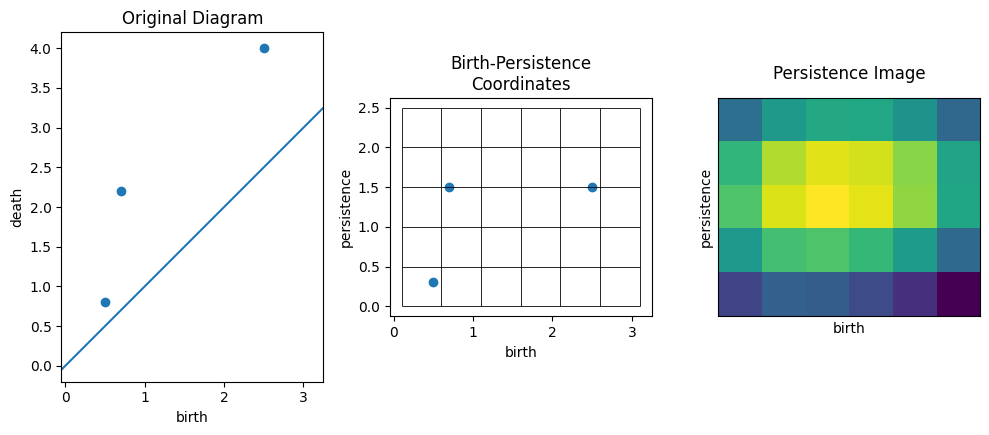

In [ ]:
# The `plot_diagram()` and `plot_image()` methods can be used to visualize persistence diagrams and images
 
fig, axs = plt.subplots(1, 3, figsize=(10,5))

axs[0].set_title("Original Diagram")
pimgr.plot_diagram(pdgms[0], skew=False, ax=axs[0])
axs[1].set_title("Birth-Persistence\nCoordinates")
pimgr.plot_diagram(pdgms[0], skew=True, ax=axs[1])

axs[2].set_title("Persistence Image")
pimgr.plot_image(pimgs[0], ax=axs[2])

plt.tight_layout()



# persistent landscape

In [ ]:
# Import general utilities
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Import TDA utilities
from ripser import Rips
from tadasets import torus, sphere
import persim
from persim import plot_diagrams
# Import Scikit-Learn tools
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import random

from ripser import ripser
from persim.landscapes import (
    PersLandscapeApprox,
    average_approx,
    snap_pl,
    plot_landscape,
    PersLandscapeExact,
    plot_landscape_simple
)
from tadasets import dsphere

In [ ]:
# Instantiate datasets
data_torus = torus(n=100, c=2, a=1)
data_sphere = sphere(n=100, r=2)

In [ ]:
# Instantiate Vietoris-Rips solver
rips = Rips(maxdim = 2)

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [ ]:
# Compute persistence diagrams
dgms_torus = rips.fit_transform(data_torus)
dgms_sphere = rips.fit_transform(data_sphere)

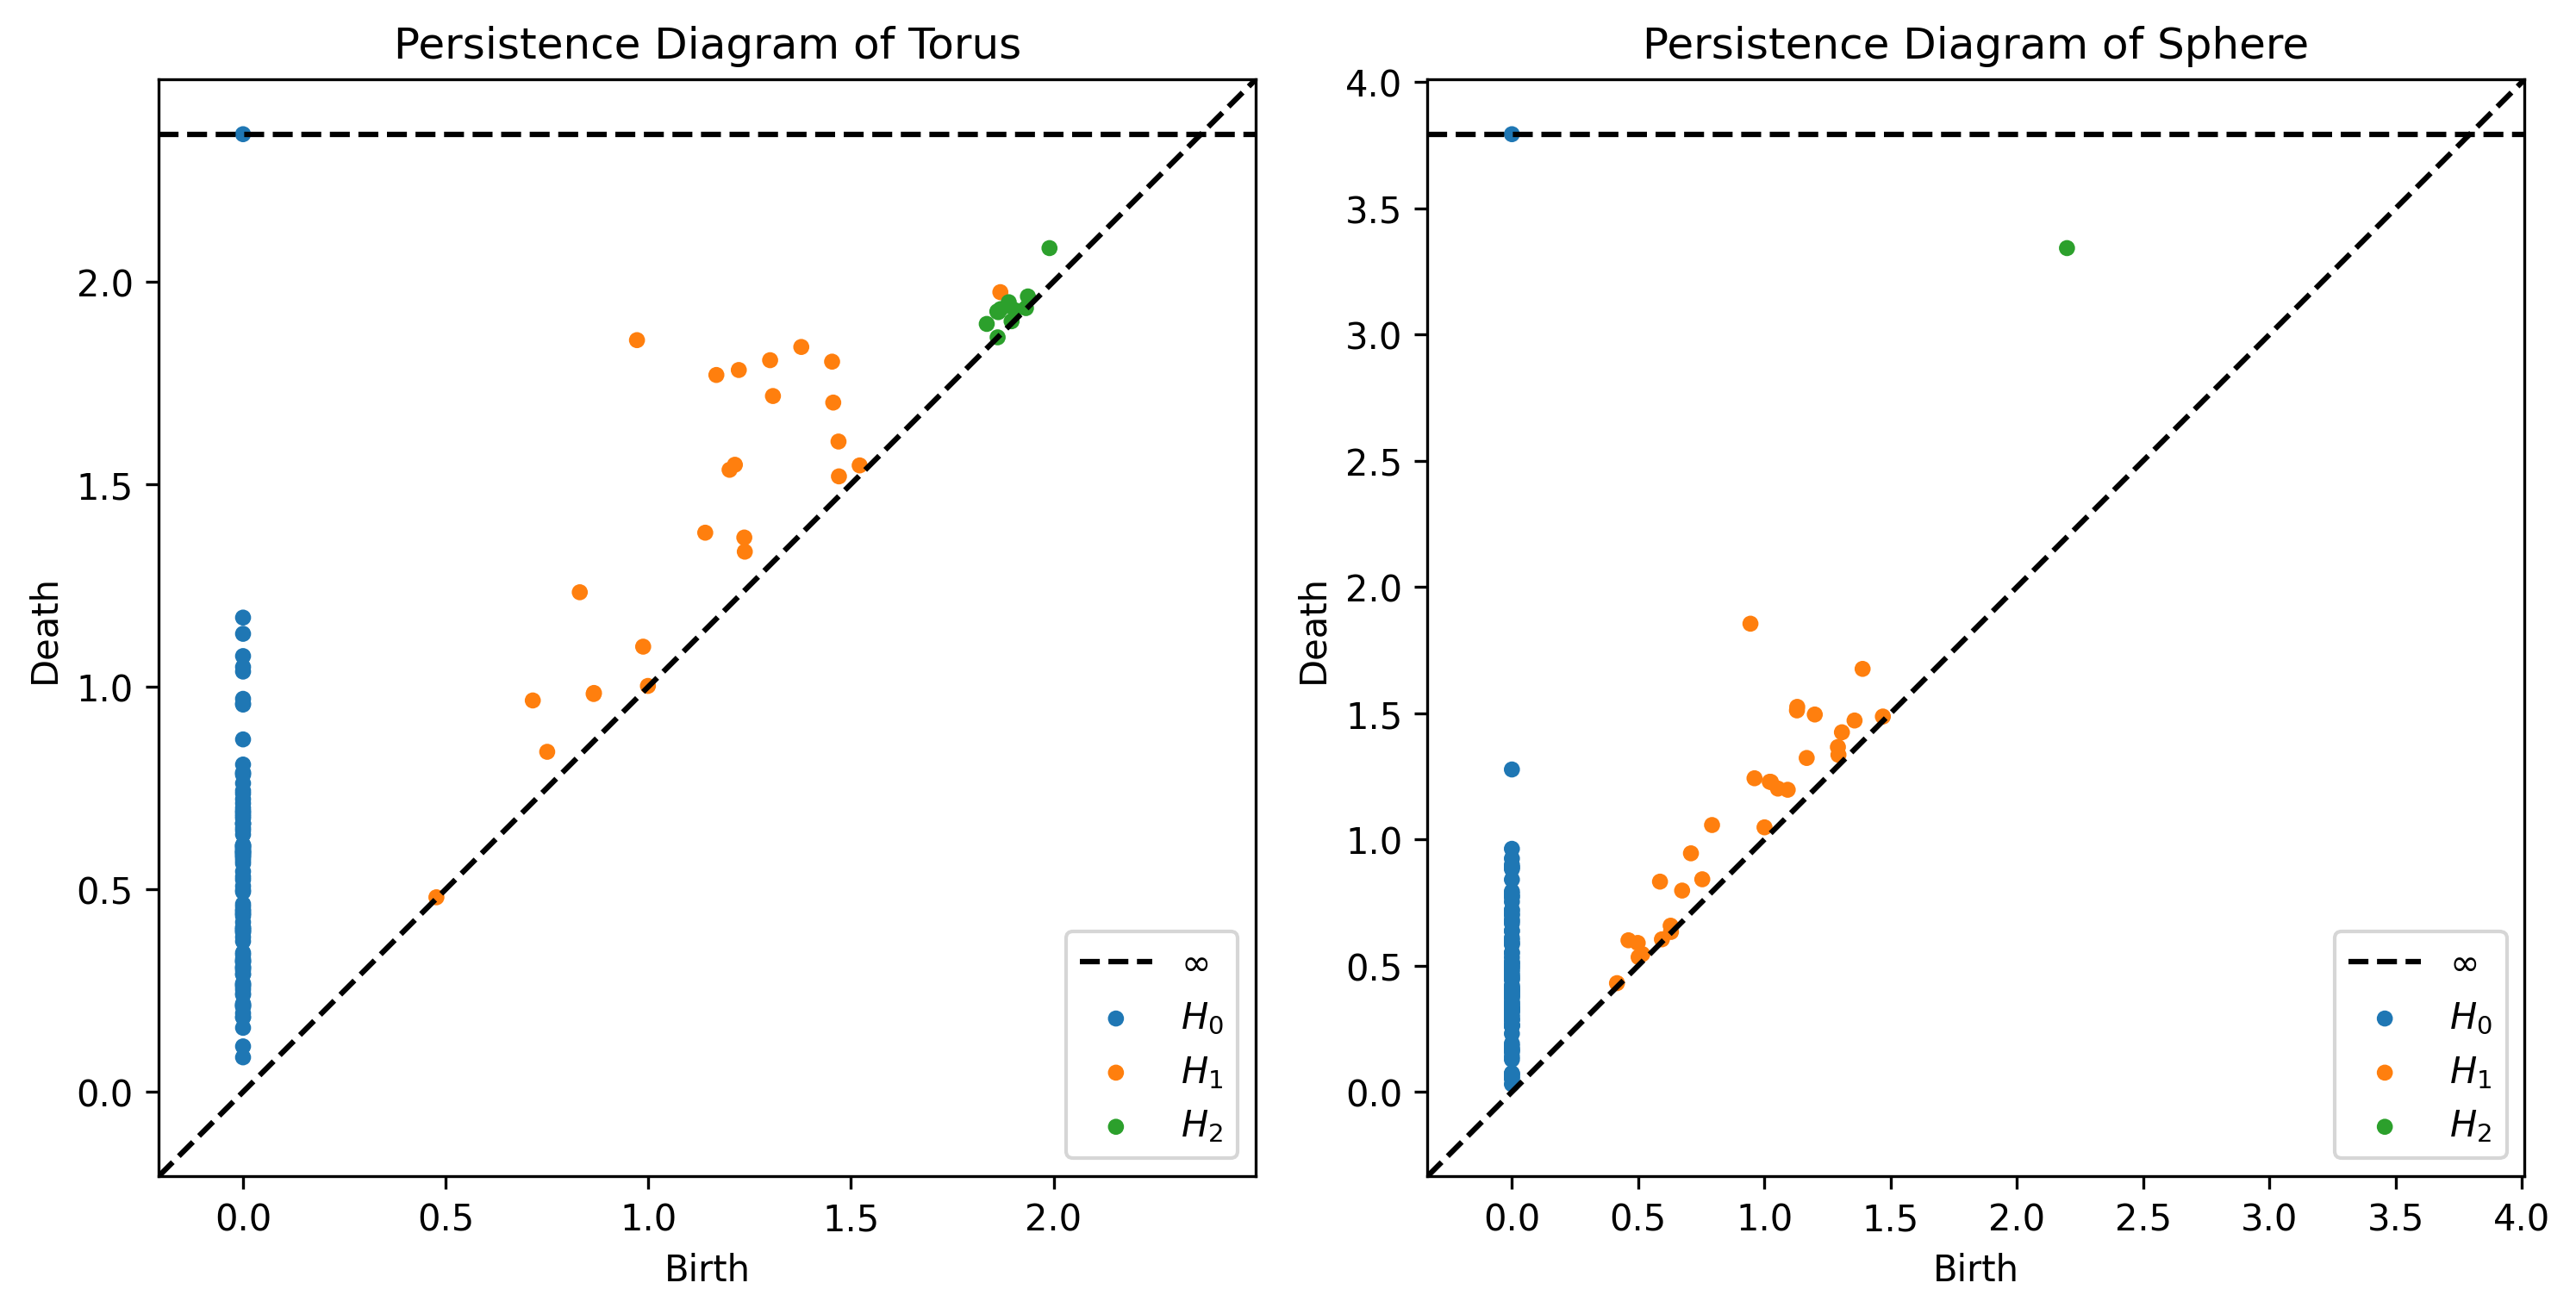

In [ ]:
# Plot persistence diagrams
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 5)

#persim.landscapes.
plot_diagrams(dgms_torus, title="Persistence Diagram of Torus", ax=axs[0])

#persim.landscapes.
plot_diagrams(dgms_sphere, title="Persistence Diagram of Sphere", ax=axs[1])

fig.tight_layout()

AttributeError: ignored

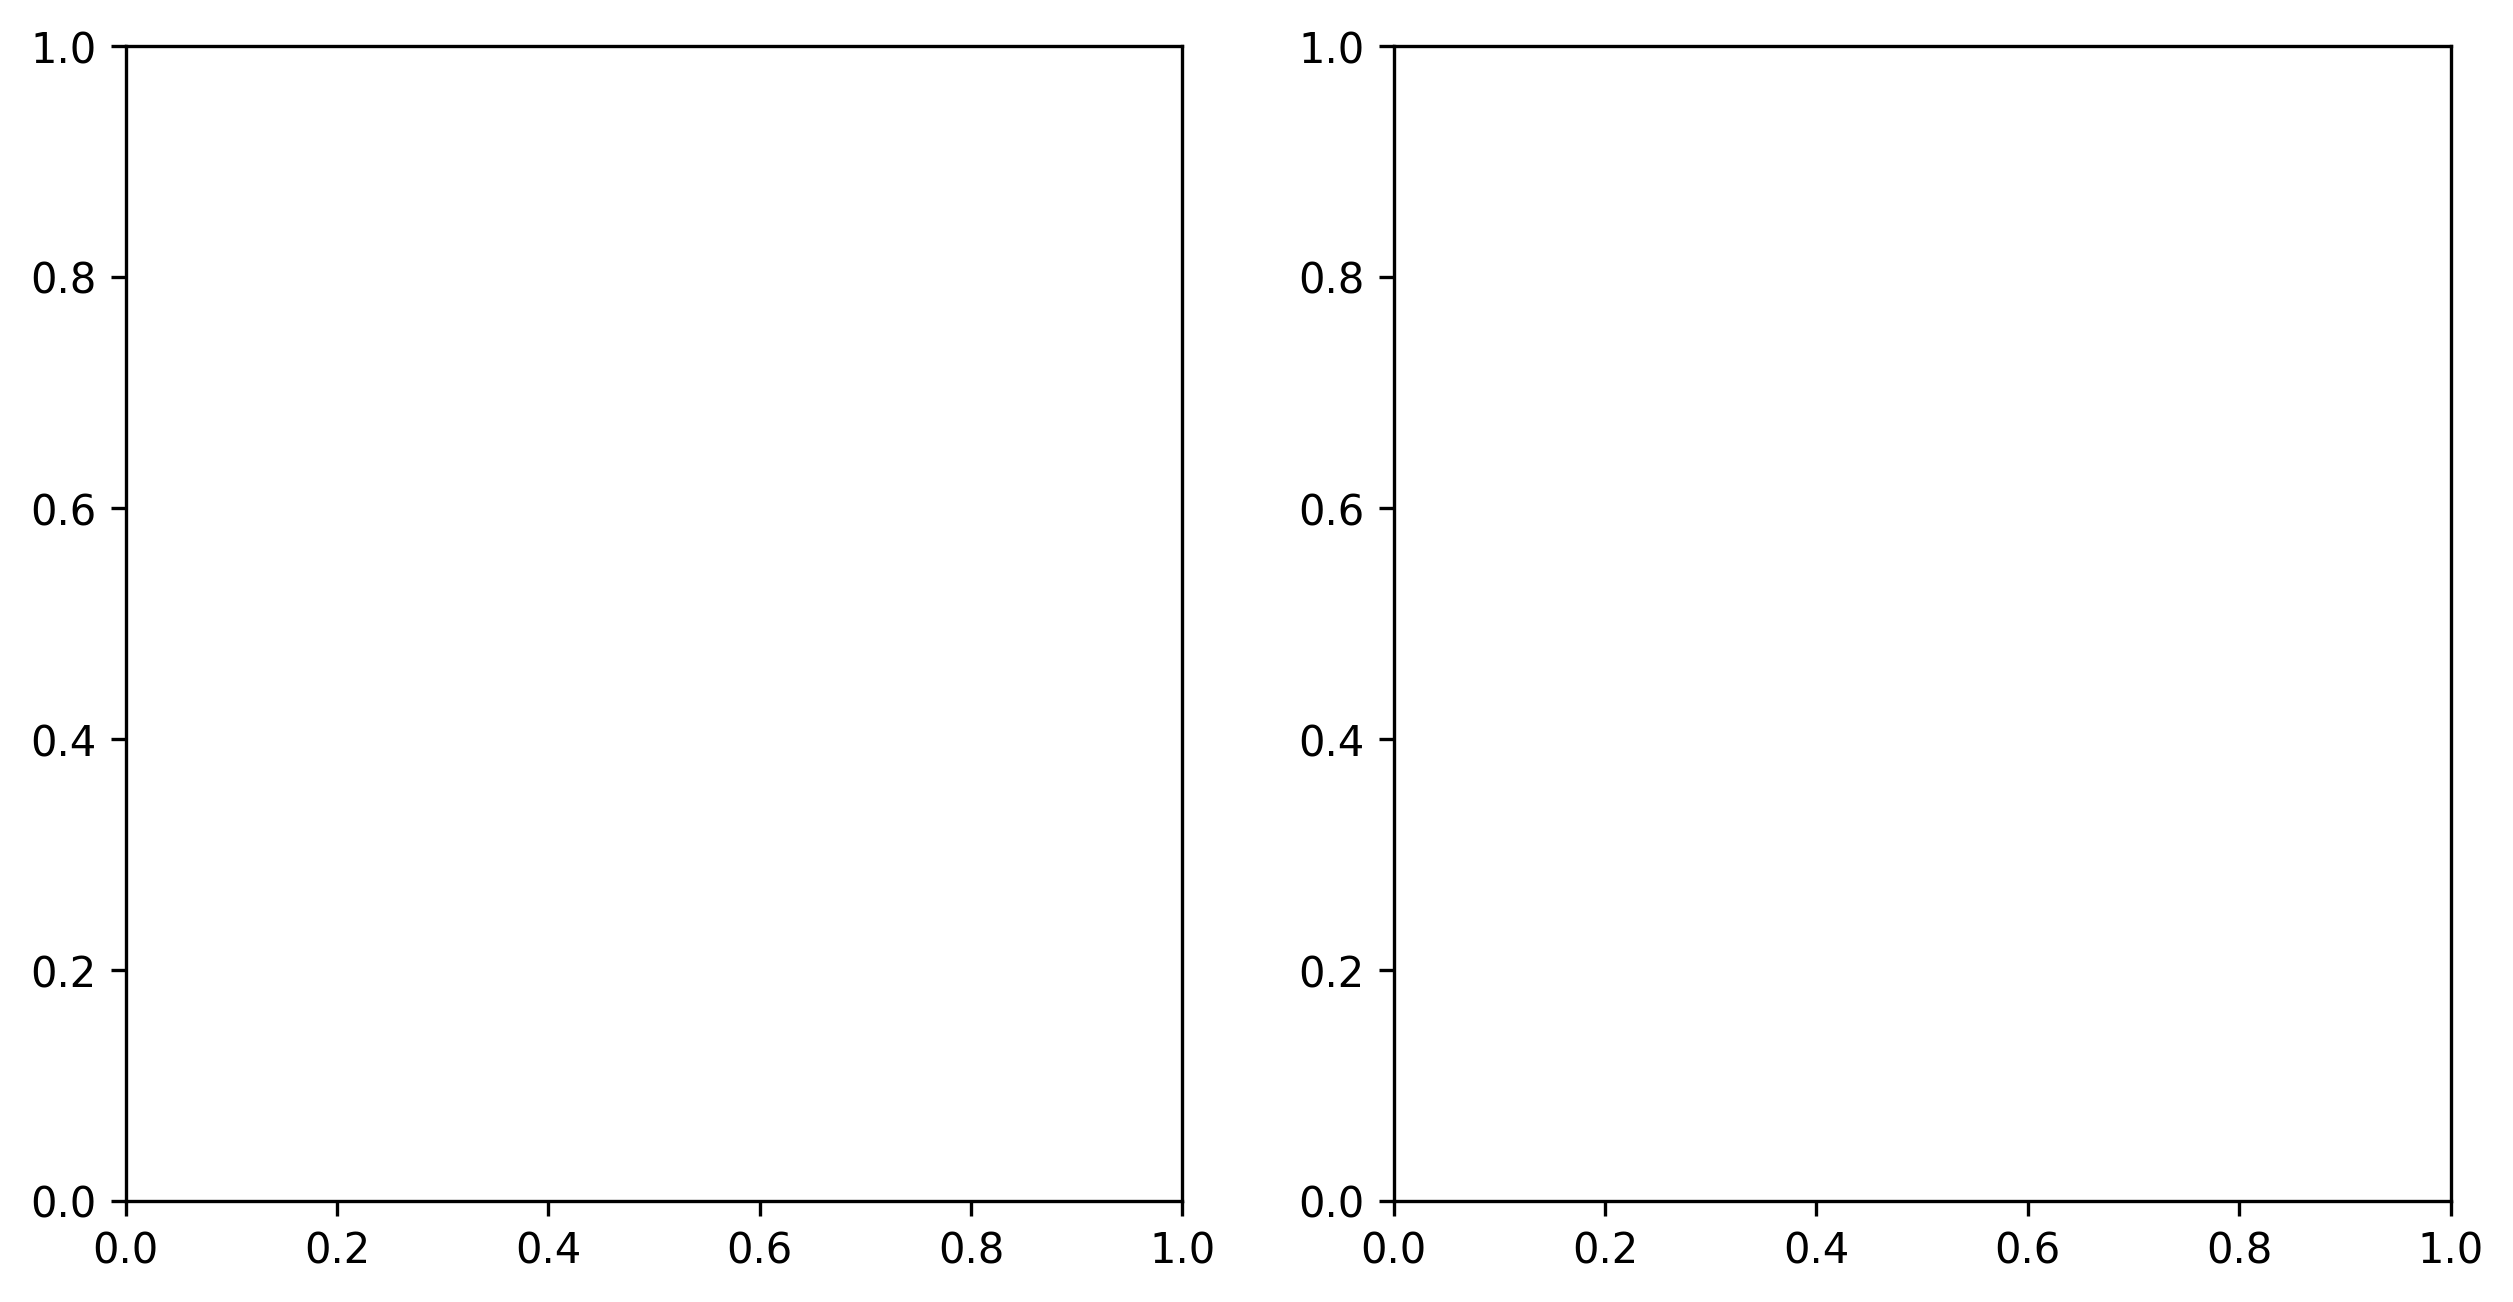

In [ ]:
# Plot persistence landscapes
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 5)

persim.landscapes.plot_landscape_simple(persim.PersLandscapeExact(dgms_torus, hom_deg=1),
                             title="Degree 1 Persistence Landscape of Torus", ax=axs[0])

persim.landscapes.plot_landscape_simple(persim.PersLandscapeExact(dgms_sphere, hom_deg=1),
                            title="Degree 1 Persistence Landscape of Sphere", ax=axs[1])

fig.tight_layout()

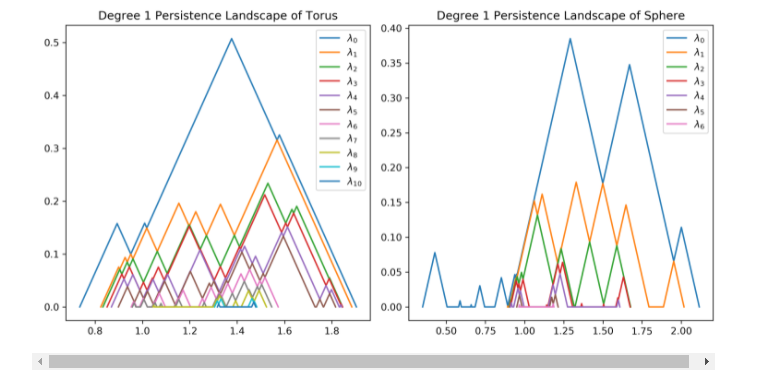

In [ ]:
import numpy as np
import random

from ripser import ripser
from persim.landscapes import (
    PersLandscapeApprox,
    average_approx,
    snap_pl,
    plot_landscape,
    plot_landscape_simple
)

In [ ]:
q = plot_landscape_simple(dgm_clean1,title='Average $PL_1$ for $S^2$.')

In [ ]:
q
